# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
df = pd.read_csv('data/human_body_temperature.csv')

In [8]:
df.head()
# The three columns are temperature, gender, and heart rate.

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [46]:
len(df)
# There are 130 records in the sample

130

## Is the distribution of body temperatures normal?

In [23]:
temp = df['temperature'] 
# Making an array of the temperature data

In [50]:
# Take a look at the mean, median, standard deviation, and IQR range
print('Median: ',np.median(temp),'\n',temp.describe())

Median:  98.3 
 count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64


In [ ]:
# Finding the right amount of bins for a hist plot
n_temp = len(temp)
n_bins = int(np.sqrt(n_temp))

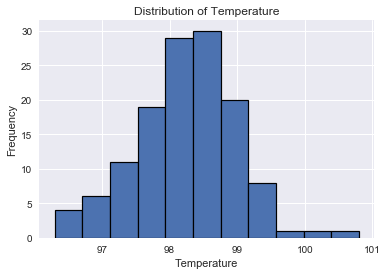

In [52]:
sns.set()
_ = plt.hist(temp, bins=n_bins,edgecolor = 'black', linewidth=1.2)
_ = plt.xlabel('Temperature')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of Temperature')

From the look of our histogram of the data, it appears that the data is normally distributed. We should continue to check this with an ECDF graph against a theroetical CDF, because there is no binning bias

In [35]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

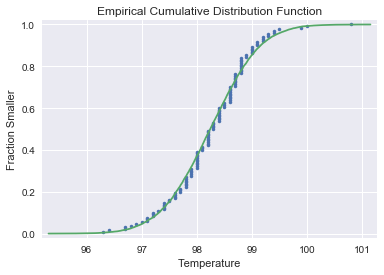

In [76]:
x,y = ecdf(temp)
_ = plt.plot(x,y,marker = '.',linestyle='none')
plt.margins(.02) # Keep data 2% away from edges
_ = plt.xlabel('Temperature')
_ = plt.ylabel('Fraction Smaller')
_ = plt.title('Empirical Cumulative Distribution Function')
sample_mean = np.mean(temp)
sample_std = np.std(temp)
samples = np.random.normal(sample_mean,sample_std, size = 10000)
x_theor,y_theor = ecdf(samples)
_ = plt.plot(x_theor, y_theor)



The theoretical CDF and the ECDF of the data suggest that temperatures are normally distributed

These are two graphical ways to view that the data is normally distributed, but lets make sure with the 68–95–99.7 rule that states that a sample is normally distributed if 68% of the data fall within 1 standard deviation away from the mean, 95 fall within 2 standard deviations away from the mean, and 99.7% fall within 3 standard deviations from the mean

In [77]:
print('1 Standard Deviation from the Mean:',len(df[(temp>sample_mean-sample_std) & (temp<sample_mean+sample_std)])/len(df)*100,'%')
print('2 Standard Deviation from the Mean:',len(df[(temp>sample_mean-sample_std*2) & (temp<sample_mean+sample_std*2)])/len(df)*100,'%')
print('3 Standard Deviation from the Mean:',len(df[(temp>sample_mean-sample_std*3) & (temp<sample_mean+sample_std*3)])/len(df)*100,'%')

1 Standard Deviation from the Mean: 69.23076923076923 %
2 Standard Deviation from the Mean: 94.61538461538461 %
3 Standard Deviation from the Mean: 99.23076923076923 %


The data is very close to the 68-95-99.7, so we can use this as more support that our data is normally distributed. Although this supports this, the 68-95-99.7 rule has its flaws. We can quickly check with a scripy.stats package whether the data is normally distributed or not. This function tests the null hypothesis that a sample comes from a normal distribution.

In [74]:
import scipy.stats as stats
stats.normaltest(temp)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

With a p-value of .259, which is large enough to where we can't reject the null hypothesis that the sample comes from a normal distribution

## 2. Is the sample size large? Are the observations independent?

The central limit theorem states that even if a population distribution is strongly non‐normal, its sampling distribution of means will be approximately normal for large sample sizes (over 30), <b> so we can conclude that the sample size is large. </b>

The [information](http://www.amstat.org/publications/jse/datasets/normtemp.txt) on the data source states that the data collection was from randomly sampled individuals. We can conclude that the observations are independent, becuase the occurrence of one does not affect the probability of occurrence of the other

# 3. Is the true population mean really 98.6 degrees F?

Our Null Hypothesis = The true mean in our sample is actually 98.6 degrees

### Bootstrap Hypothesis Test

In [103]:
# We need to shift the sample data such that its mean matches the test_mean
test_mean = 98.6
sample_mean = np.mean(temp)
shifted_temp = temp - sample_mean + test_mean

Our <b>test statistic</b> is the difference between the sample mean and the test mean. We can create a function to calculate it, so that the bootstrap hypothesis test is easier

In [104]:
def diff_from_test(data,test_value=98.6):
    # Calculate the difference of an array from the test mean
    return np.mean(data) - test_value

diff_observed = diff_from_test(temp)
print(diff_observed)

-0.35076923076921673


We can now use bootstrapping on the shifted data to simulate data acquistion under the null hypothesis

In [108]:
# Initializing the replicates
bs_replicates = np.empty(10000)

# Generate replicates
for i in range(10000):
    bs_replicates[i] = diff_from_test(np.random.choice(shifted_temp,len(shifted_temp)))

p_value = np.sum(bs_replicates <= diff_observed) /len(bs_replicates)
print('P-Value: {:.6f}'.format(p_value))

P-Value: 0.000000


The bootstrap hypothesis test has shown a p-value of 0. This doesn't mean that our sample could never happen, just that it did not happen even once in 10000 bootstrap samples. From this bootstrap I would reject the null hypothesis that the test mean (96.8) is the true mean.

### Frequentist Statistical Test
t-test = x̄-μ / s/√n

z-test = x – μ / σ
#### Would you use a one-sample or two-sample test? Why?
We would use a one-sample test, becuase we are comparing only temperature that was measured once from each observation.

#### Is it appropriate to use the  t  or  z  statistic?
It is appropriate to use the t statistic, because the population standard deviation is unknown

In [135]:
t_test = stats.ttest_1samp(temp,test_mean)
print('t-statistic: %.5f | p-value: %.5f.' % t_test)

t-statistic: -5.45482 | p-value: 0.00000.


We can reject the null hypothesis again with having such a low p-value

#### Now try using the other test. How is the result be different? Why?

In [129]:
std_pop = sample_std / len(temp) ** 0.5
z_score = (np.mean(temp) - 98.6) / std_pop
print('z-score: {:.5f}'.format(z_score))

p_value = stats.norm.sf(abs(z_score)) #one-sided
print('p-value: {:.5f}'.format(p_value))

z-score: -5.47593
p-value: 0.00000


The z test provided another very low p-value and we can again reject the p-value

# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

#### Which one is the correct one to use?
The correct one to use is the t-statistic becuase it has fewer then 30 observations

In [209]:
np.random.seed(4)
sample_10 = np.random.choice(temp, 10)

In [210]:
sample_10_tt = stats.ttest_1samp(sample_10, popmean=98.6)
print('t-statistic: %.5f | p-value: %.5f.' % sample_10_tt)

t-statistic: -1.16775 | p-value: 0.27291.


In [207]:
std_pop_10 = np.std(sample_10) / len(sample_10) ** 0.5
z_score_10 = (np.mean(sample_10) - 98.6) / std_pop_10
print('z-score: {:.5f}'.format(z_score_10))

p_value_10 = stats.norm.sf(abs(z_score_10)) #one-sided
print('p-value: {:.5f}'.format(p_value_10))

z-score: -1.23091
p-value: 0.10918


#### What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?

The new sample with 10 observations has much larger p-value from both the t-test and the z-test. We could accept the null hypothesis at 0.05 level. The t-test has a much larger p-value then the z-test does. 

# 5. At what temperature should we consider someone's temperature to be "abnormal"?

Margin of Error (ME) = z * SE
Standard Error (SE) = s /√n

In [224]:
se = np.std(temp)/np.sqrt(len(temp))
me = 1.96*se

In [225]:
print('95% confidence interval =', [sample_mean-me,sample_mean+me])

95% confidence interval = [98.123679804428193, 98.374781734033363]


Choosing a 95% Confidence Interval, we have found that a temperature lower than 98.12 or a temperature higher than 98.37 could be percieved as 'abnormal'.

In [226]:
bs_replicates_mean = np.empty(10000)

# Generate replicates
for i in range(10000):
    bs_replicates_mean[i] = np.mean(np.random.choice(temp,len(temp)))
    
print('95% confidence interval =', np.percentile(bs_replicates_mean,[2.5,95]))

95% confidence interval = [ 98.12230769  98.35461538]


In [ ]:
Doing a bootstrap gives us almost the same exact results.

# 6. Is there a significant difference between males and females in normal temperature?

Our Null hypothesis is that there is no statistically difference in body temperautre between the groups

In [230]:
female_temp = df[df['gender'] == 'F']['temperature']
male_temp = df[df['gender'] == 'M']['temperature']

We can test with a t-test because the population standard deviation is unknown

In [232]:
t_test_diff = stats.ttest_ind(female_temp, male_temp)
print('t-statistic: %.5f | p-value: %.5f.' % t_test_diff)

t-statistic: 2.28543 | p-value: 0.02393.


We can reject the null hypothesis, since the p-value is lower then .05. Our statistical analysis has showed us that the normal human body temperature is not what has been taught for so many years. We have also found that opposite genders have different average body temperatures. 